In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
data_00="/home/mustapha/Downloads/data_65.csv"
df= pd.read_csv(data_00, nrows=176)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   source                            176 non-null    object 
 1   Publication year                  173 non-null    float64
 2   T of the conductivity C           173 non-null    float64
 3   Li stoichiometry                  176 non-null    float64
 4   La stoichiometry                  176 non-null    float64
 5   Zr stoichiometry                  176 non-null    float64
 6   Li site dopant stoichiometry      176 non-null    float64
 7   La site dopant stoichiometry      176 non-null    float64
 8   Zr site dopant stoichiometry      176 non-null    float64
 9   Relative density                  126 non-null    float64
 10  Ionic conductivity                176 non-null    float64
 11  log_cond                          176 non-null    float64
 12  Quality 

In [3]:
X=df
X = X.drop(['Ionic conductivity'],axis=1)
X = X.drop(['Publication year','Quality of ionic conductivity','source','Doping strategy'], axis=1)


# X = X.drop(['Li site dopant ionic radius','La site dopant ionic radius','Zr site dopant ionic radius'], axis=1)
# X = X.drop(['Li site dopant ion charge','La site dopant ion charge','Zr site dopant ion charge'], axis=1)
# X = X.drop(['Li site dopant ionic rad.','La site dopant ionic rad.','Zr site dopant ionic rad.'], axis=1)
# X = X.drop(['Li stoichiometry','La stoichiometry', 'Zr stoichiometry'], axis=1)
X = X.drop(['Li site dopant stoichiometry','La site dopant stoichiometry','Zr site dopant stoichiometry'], axis=1)
# X = X.drop(['Li site dopant electroneg.','La site dopant electroneg.','Zr site dopant electroneg.'], axis=1)
# X = X.drop(['Li site dopant ion charge','La site dopant ion charge','Zr site dopant ion charge'], axis=1)
# X = X.drop(['Li site dopant crystal rad.','La site dopant crystal rad.','Zr site dopant crystal rad.'], axis=1)
# # X = X.drop(['Li site dopant electroneg.','La site dopant electroneg.','Zr site dopant electroneg.'], axis=1)
# X = X.drop(['Li site dopant molar mass','La site dopant molar mass','Zr site dopant molar mass'], axis=1)
X = X.drop(['Li site dopant atomic number','La site dopant atomic number','Zr site dopant atomic number'], axis=1)
# X = X.drop(['Li site dopant e_ionisation','La site dopant e_ionisation','Zr site dopant e_ionisation'], axis=1)
X = X.drop(['Li site dopant electron affinity','La site dopant electron affinity','Zr site dopant electron affinity'], axis=1)
X = X.drop(['Li site dopant atomic radius','La site dopant atomic radius','Zr site dopant atomic radius'], axis=1)

X = X.drop(['li_dopant','la_dopant','zr_dopant'], axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   T of the conductivity C      173 non-null    float64
 1   Li stoichiometry             176 non-null    float64
 2   La stoichiometry             176 non-null    float64
 3   Zr stoichiometry             176 non-null    float64
 4   Relative density             126 non-null    float64
 5   log_cond                     176 non-null    float64
 6   Li site dopant crystal rad.  176 non-null    int64  
 7   Li site dopant ion charge    176 non-null    int64  
 8   Li site dopant electroneg.   176 non-null    float64
 9   Li site dopant molar mass    176 non-null    float64
 10  Li site dopant e_ionisation  176 non-null    float64
 11  Li site dopant ionic radius  176 non-null    float64
 12  La site dopant crystal rad.  176 non-null    int64  
 13  La site dopant ion c

In [4]:
# Missing values

##########################
# # Sort the DataFrame by the "c" column
# X_sorted = X.sort_values(by='log_cond')

# # # Perform linear interpolation on the "rd" column
# X_filled = X_sorted.interpolate(method='linear', limit_direction='both', inplace=False)
# c=X_filled['log_cond']

# X_filled=X_filled.drop('log_cond', axis=1)

# Y = c
# X_filled.info()

X_knn.info()

#########################

# X= X[X['Relative density'] >= 80]
# X= X[X['Ionic conductivity'] <= 1.2e-03]
    
# rd_mean = X['Relative density'].mean()
# X = X.fillna({'Relative density': rd_mean})
# Y = X['log_cond']
# X = X.drop(['log_cond'],axis=1)

# X = X.dropna()
# c = X['log_cond']
# X = X.drop(['log_cond'],axis=1)
# Y = c

#########################

from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3)
# Fit and transform the data to impute the missing values
X_knn = knn_imputer.fit_transform(X)

# Convert the imputed NumPy array back to a DataFrame and specify column names
X_knn = pd.DataFrame(data=X_knn, columns=X.columns)

# Assuming you already have 'Ionic conductivity' in the DataFrame
Y = X_knn['log_cond']

# Drop the 'Ionic conductivity' column from X
X_knn = X_knn.drop('log_cond', axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   T of the conductivity C      176 non-null    float64
 1   Li stoichiometry             176 non-null    float64
 2   La stoichiometry             176 non-null    float64
 3   Zr stoichiometry             176 non-null    float64
 4   Relative density             176 non-null    float64
 5   Li site dopant crystal rad.  176 non-null    float64
 6   Li site dopant ion charge    176 non-null    float64
 7   Li site dopant electroneg.   176 non-null    float64
 8   Li site dopant molar mass    176 non-null    float64
 9   Li site dopant e_ionisation  176 non-null    float64
 10  Li site dopant ionic radius  176 non-null    float64
 11  La site dopant crystal rad.  176 non-null    float64
 12  La site dopant ion charge    176 non-null    float64
 13  La site dopant elect

In [5]:
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [6]:
# Define a list of regression models to test
models = [
    HistGradientBoostingRegressor(),
    LinearRegression(),
    Ridge(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    XGBRegressor(),
    LGBMRegressor(),
    CatBoostRegressor()
]


results = []

# number of iterations
num_iterations = 100

# Iterating over the models and evaluating each one 30 times
for model in models:
    avg_mse = 0
    avg_r2 = 0
    
    model_name = type(model).__name__
    
    for _ in range(num_iterations):
        # Splitting the data into training and testing sets for each iteration
        X_train, X_test, Y_train, Y_test = train_test_split(X_knn, Y, test_size=0.25, random_state=42, shuffle=True)
        
        # Fitting the model and make predictions
        model.fit(X_train, Y_train)
        Y_train_pred = model.predict(X_train)
        Y_test_pred = model.predict(X_test)
        
        # Calculating metrics for this iteration
        mse = mean_squared_error(Y_test, Y_test_pred)
        r2 = r2_score(Y_test, Y_test_pred)
        
        
        
        # Updating the average metrics
        avg_mse += mse
        avg_r2 += r2
    
    # Calculating the average metrics over the iterations
    avg_mse /= num_iterations
    avg_r2 /= num_iterations
    results.append({"Model": model_name, "R-squared (R2)": avg_r2, "Mean Squared Error (MSE)": avg_mse})

results_df = pd.DataFrame(results)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 186
[LightGBM] [Info] Number of data points in the train set: 132, number of used features: 23
[LightGBM] [Info] Start training from score -3.686273
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 186
[LightGBM] [Info] Number of data points in the train set: 132, number of used features: 23
[LightGBM] [Info] Start training from score -3.686273
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

Learning rate set to 0.029732
0:	learn: 0.6704182	total: 62.4ms	remaining: 1m 2s
1:	learn: 0.6633001	total: 63.3ms	remaining: 31.6s
2:	learn: 0.6585822	total: 64.2ms	remaining: 21.3s
3:	learn: 0.6530494	total: 65.1ms	remaining: 16.2s
4:	learn: 0.6462524	total: 66ms	remaining: 13.1s
5:	learn: 0.6409965	total: 66.8ms	remaining: 11.1s
6:	learn: 0.6352476	total: 67.7ms	remaining: 9.6s
7:	learn: 0.6297965	total: 68.3ms	remaining: 8.47s
8:	learn: 0.6238494	total: 68.7ms	remaining: 7.56s
9:	learn: 0.6212745	total: 69.3ms	remaining: 6.86s
10:	learn: 0.6144049	total: 69.9ms	remaining: 6.29s
11:	learn: 0.6103600	total: 70.6ms	remaining: 5.81s
12:	learn: 0.6052130	total: 71.2ms	remaining: 5.41s
13:	learn: 0.6031654	total: 71.9ms	remaining: 5.07s
14:	learn: 0.5979673	total: 72.6ms	remaining: 4.77s
15:	learn: 0.5929378	total: 73.3ms	remaining: 4.51s
16:	learn: 0.5898019	total: 73.9ms	remaining: 4.28s
17:	learn: 0.5844220	total: 74.6ms	remaining: 4.07s
18:	learn: 0.5798953	total: 75.3ms	remaining: 3

356:	learn: 0.2545740	total: 314ms	remaining: 565ms
357:	learn: 0.2540378	total: 315ms	remaining: 565ms
358:	learn: 0.2529705	total: 316ms	remaining: 564ms
359:	learn: 0.2518576	total: 316ms	remaining: 562ms
360:	learn: 0.2515287	total: 317ms	remaining: 561ms
361:	learn: 0.2507418	total: 318ms	remaining: 560ms
362:	learn: 0.2506404	total: 319ms	remaining: 559ms
363:	learn: 0.2505373	total: 320ms	remaining: 558ms
364:	learn: 0.2503312	total: 320ms	remaining: 557ms
365:	learn: 0.2502113	total: 322ms	remaining: 557ms
366:	learn: 0.2500767	total: 322ms	remaining: 556ms
367:	learn: 0.2494960	total: 323ms	remaining: 555ms
368:	learn: 0.2492377	total: 324ms	remaining: 554ms
369:	learn: 0.2491402	total: 325ms	remaining: 553ms
370:	learn: 0.2486624	total: 326ms	remaining: 552ms
371:	learn: 0.2479191	total: 326ms	remaining: 551ms
372:	learn: 0.2474929	total: 327ms	remaining: 550ms
373:	learn: 0.2473025	total: 328ms	remaining: 549ms
374:	learn: 0.2471918	total: 329ms	remaining: 548ms
375:	learn: 

601:	learn: 0.1660358	total: 491ms	remaining: 325ms
602:	learn: 0.1656431	total: 495ms	remaining: 326ms
603:	learn: 0.1656093	total: 495ms	remaining: 325ms
604:	learn: 0.1654934	total: 496ms	remaining: 324ms
605:	learn: 0.1652927	total: 496ms	remaining: 323ms
606:	learn: 0.1649745	total: 497ms	remaining: 322ms
607:	learn: 0.1649170	total: 498ms	remaining: 321ms
608:	learn: 0.1646293	total: 499ms	remaining: 320ms
609:	learn: 0.1642341	total: 499ms	remaining: 319ms
610:	learn: 0.1640524	total: 500ms	remaining: 318ms
611:	learn: 0.1640124	total: 501ms	remaining: 317ms
612:	learn: 0.1636834	total: 502ms	remaining: 317ms
613:	learn: 0.1633268	total: 502ms	remaining: 316ms
614:	learn: 0.1628346	total: 503ms	remaining: 315ms
615:	learn: 0.1627972	total: 504ms	remaining: 314ms
616:	learn: 0.1623130	total: 505ms	remaining: 313ms
617:	learn: 0.1618759	total: 505ms	remaining: 312ms
618:	learn: 0.1616231	total: 506ms	remaining: 312ms
619:	learn: 0.1615554	total: 507ms	remaining: 311ms
620:	learn: 

798:	learn: 0.1272885	total: 676ms	remaining: 170ms
799:	learn: 0.1272612	total: 680ms	remaining: 170ms
800:	learn: 0.1271133	total: 681ms	remaining: 169ms
801:	learn: 0.1268806	total: 683ms	remaining: 169ms
802:	learn: 0.1268573	total: 684ms	remaining: 168ms
803:	learn: 0.1266293	total: 687ms	remaining: 167ms
804:	learn: 0.1264866	total: 688ms	remaining: 167ms
805:	learn: 0.1261999	total: 689ms	remaining: 166ms
806:	learn: 0.1259590	total: 689ms	remaining: 165ms
807:	learn: 0.1256845	total: 690ms	remaining: 164ms
808:	learn: 0.1254552	total: 691ms	remaining: 163ms
809:	learn: 0.1252189	total: 692ms	remaining: 162ms
810:	learn: 0.1250048	total: 693ms	remaining: 161ms
811:	learn: 0.1249839	total: 693ms	remaining: 161ms
812:	learn: 0.1249559	total: 694ms	remaining: 160ms
813:	learn: 0.1248901	total: 695ms	remaining: 159ms
814:	learn: 0.1245693	total: 696ms	remaining: 158ms
815:	learn: 0.1245482	total: 697ms	remaining: 157ms
816:	learn: 0.1243556	total: 698ms	remaining: 156ms
817:	learn: 

Learning rate set to 0.029732
0:	learn: 0.6704182	total: 818us	remaining: 817ms
1:	learn: 0.6633001	total: 1.49ms	remaining: 744ms
2:	learn: 0.6585822	total: 2.2ms	remaining: 730ms
3:	learn: 0.6530494	total: 2.88ms	remaining: 718ms
4:	learn: 0.6462524	total: 3.85ms	remaining: 765ms
5:	learn: 0.6409965	total: 5.61ms	remaining: 930ms
6:	learn: 0.6352476	total: 6.31ms	remaining: 895ms
7:	learn: 0.6297965	total: 7.01ms	remaining: 870ms
8:	learn: 0.6238494	total: 7.39ms	remaining: 814ms
9:	learn: 0.6212745	total: 8.04ms	remaining: 796ms
10:	learn: 0.6144049	total: 9.14ms	remaining: 822ms
11:	learn: 0.6103600	total: 9.97ms	remaining: 821ms
12:	learn: 0.6052130	total: 10.7ms	remaining: 811ms
13:	learn: 0.6031654	total: 11.4ms	remaining: 800ms
14:	learn: 0.5979673	total: 12.3ms	remaining: 807ms
15:	learn: 0.5929378	total: 13ms	remaining: 798ms
16:	learn: 0.5898019	total: 13.6ms	remaining: 788ms
17:	learn: 0.5844220	total: 14.3ms	remaining: 781ms
18:	learn: 0.5798953	total: 15ms	remaining: 773m

264:	learn: 0.3018506	total: 181ms	remaining: 503ms
265:	learn: 0.3011198	total: 182ms	remaining: 503ms
266:	learn: 0.3003310	total: 183ms	remaining: 503ms
267:	learn: 0.3000881	total: 184ms	remaining: 502ms
268:	learn: 0.2998730	total: 184ms	remaining: 501ms
269:	learn: 0.2996206	total: 185ms	remaining: 501ms
270:	learn: 0.2992453	total: 186ms	remaining: 500ms
271:	learn: 0.2990339	total: 188ms	remaining: 504ms
272:	learn: 0.2988105	total: 189ms	remaining: 504ms
273:	learn: 0.2985754	total: 190ms	remaining: 504ms
274:	learn: 0.2983773	total: 191ms	remaining: 504ms
275:	learn: 0.2980617	total: 192ms	remaining: 504ms
276:	learn: 0.2969759	total: 193ms	remaining: 504ms
277:	learn: 0.2967164	total: 194ms	remaining: 503ms
278:	learn: 0.2965070	total: 195ms	remaining: 503ms
279:	learn: 0.2963282	total: 195ms	remaining: 502ms
280:	learn: 0.2961011	total: 196ms	remaining: 501ms
281:	learn: 0.2952071	total: 197ms	remaining: 501ms
282:	learn: 0.2940980	total: 197ms	remaining: 500ms
283:	learn: 

459:	learn: 0.2118931	total: 357ms	remaining: 419ms
460:	learn: 0.2117141	total: 358ms	remaining: 419ms
461:	learn: 0.2110455	total: 362ms	remaining: 422ms
462:	learn: 0.2105582	total: 364ms	remaining: 422ms
463:	learn: 0.2104868	total: 365ms	remaining: 421ms
464:	learn: 0.2104245	total: 366ms	remaining: 421ms
465:	learn: 0.2103436	total: 367ms	remaining: 421ms
466:	learn: 0.2095773	total: 369ms	remaining: 421ms
467:	learn: 0.2095139	total: 370ms	remaining: 421ms
468:	learn: 0.2093741	total: 371ms	remaining: 420ms
469:	learn: 0.2092344	total: 372ms	remaining: 419ms
470:	learn: 0.2089071	total: 373ms	remaining: 419ms
471:	learn: 0.2087741	total: 373ms	remaining: 418ms
472:	learn: 0.2087167	total: 374ms	remaining: 417ms
473:	learn: 0.2084069	total: 375ms	remaining: 416ms
474:	learn: 0.2082620	total: 375ms	remaining: 415ms
475:	learn: 0.2080982	total: 376ms	remaining: 414ms
476:	learn: 0.2071808	total: 379ms	remaining: 415ms
477:	learn: 0.2067853	total: 380ms	remaining: 415ms
478:	learn: 

693:	learn: 0.1456083	total: 536ms	remaining: 236ms
694:	learn: 0.1451955	total: 538ms	remaining: 236ms
695:	learn: 0.1450238	total: 538ms	remaining: 235ms
696:	learn: 0.1446839	total: 539ms	remaining: 234ms
697:	learn: 0.1446308	total: 540ms	remaining: 234ms
698:	learn: 0.1445779	total: 541ms	remaining: 233ms
699:	learn: 0.1445433	total: 542ms	remaining: 232ms
700:	learn: 0.1442929	total: 543ms	remaining: 232ms
701:	learn: 0.1440732	total: 544ms	remaining: 231ms
702:	learn: 0.1437978	total: 545ms	remaining: 230ms
703:	learn: 0.1435530	total: 546ms	remaining: 229ms
704:	learn: 0.1435076	total: 546ms	remaining: 229ms
705:	learn: 0.1434778	total: 547ms	remaining: 228ms
706:	learn: 0.1432662	total: 548ms	remaining: 227ms
707:	learn: 0.1430843	total: 549ms	remaining: 226ms
708:	learn: 0.1428620	total: 549ms	remaining: 225ms
709:	learn: 0.1425975	total: 550ms	remaining: 225ms
710:	learn: 0.1425717	total: 551ms	remaining: 224ms
711:	learn: 0.1422626	total: 552ms	remaining: 223ms
712:	learn: 

946:	learn: 0.1041240	total: 715ms	remaining: 40ms
947:	learn: 0.1041027	total: 716ms	remaining: 39.3ms
948:	learn: 0.1039850	total: 717ms	remaining: 38.5ms
949:	learn: 0.1037039	total: 718ms	remaining: 37.8ms
950:	learn: 0.1034884	total: 718ms	remaining: 37ms
951:	learn: 0.1034755	total: 719ms	remaining: 36.3ms
952:	learn: 0.1034517	total: 720ms	remaining: 35.5ms
953:	learn: 0.1032707	total: 721ms	remaining: 34.7ms
954:	learn: 0.1031334	total: 721ms	remaining: 34ms
955:	learn: 0.1029990	total: 722ms	remaining: 33.2ms
956:	learn: 0.1029873	total: 723ms	remaining: 32.5ms
957:	learn: 0.1028783	total: 723ms	remaining: 31.7ms
958:	learn: 0.1026769	total: 724ms	remaining: 31ms
959:	learn: 0.1025593	total: 725ms	remaining: 30.2ms
960:	learn: 0.1023070	total: 726ms	remaining: 29.4ms
961:	learn: 0.1021184	total: 726ms	remaining: 28.7ms
962:	learn: 0.1019609	total: 727ms	remaining: 27.9ms
963:	learn: 0.1019392	total: 728ms	remaining: 27.2ms
964:	learn: 0.1019265	total: 729ms	remaining: 26.4ms
9

194:	learn: 0.3511044	total: 177ms	remaining: 731ms
195:	learn: 0.3495542	total: 178ms	remaining: 730ms
196:	learn: 0.3491640	total: 179ms	remaining: 729ms
197:	learn: 0.3483818	total: 180ms	remaining: 728ms
198:	learn: 0.3480256	total: 181ms	remaining: 729ms
199:	learn: 0.3468796	total: 182ms	remaining: 728ms
200:	learn: 0.3462281	total: 183ms	remaining: 727ms
201:	learn: 0.3458220	total: 184ms	remaining: 727ms
202:	learn: 0.3453802	total: 185ms	remaining: 726ms
203:	learn: 0.3449098	total: 186ms	remaining: 724ms
204:	learn: 0.3445400	total: 186ms	remaining: 723ms
205:	learn: 0.3440608	total: 187ms	remaining: 721ms
206:	learn: 0.3437416	total: 189ms	remaining: 722ms
207:	learn: 0.3431342	total: 190ms	remaining: 725ms
208:	learn: 0.3417928	total: 191ms	remaining: 723ms
209:	learn: 0.3410459	total: 192ms	remaining: 721ms
210:	learn: 0.3407966	total: 192ms	remaining: 719ms
211:	learn: 0.3401134	total: 193ms	remaining: 717ms
212:	learn: 0.3395474	total: 193ms	remaining: 715ms
213:	learn: 

409:	learn: 0.2320800	total: 359ms	remaining: 517ms
410:	learn: 0.2315061	total: 360ms	remaining: 516ms
411:	learn: 0.2311077	total: 361ms	remaining: 516ms
412:	learn: 0.2306139	total: 362ms	remaining: 515ms
413:	learn: 0.2298262	total: 363ms	remaining: 514ms
414:	learn: 0.2292390	total: 364ms	remaining: 513ms
415:	learn: 0.2286143	total: 365ms	remaining: 512ms
416:	learn: 0.2275750	total: 366ms	remaining: 511ms
417:	learn: 0.2265693	total: 367ms	remaining: 510ms
418:	learn: 0.2264868	total: 368ms	remaining: 510ms
419:	learn: 0.2260421	total: 370ms	remaining: 510ms
420:	learn: 0.2258654	total: 371ms	remaining: 510ms
421:	learn: 0.2257853	total: 372ms	remaining: 510ms
422:	learn: 0.2255591	total: 373ms	remaining: 509ms
423:	learn: 0.2254864	total: 374ms	remaining: 508ms
424:	learn: 0.2246178	total: 374ms	remaining: 507ms
425:	learn: 0.2239411	total: 375ms	remaining: 506ms
426:	learn: 0.2232192	total: 376ms	remaining: 505ms
427:	learn: 0.2230147	total: 377ms	remaining: 503ms
428:	learn: 

601:	learn: 0.1660358	total: 537ms	remaining: 355ms
602:	learn: 0.1656431	total: 543ms	remaining: 357ms
603:	learn: 0.1656093	total: 544ms	remaining: 357ms
604:	learn: 0.1654934	total: 545ms	remaining: 356ms
605:	learn: 0.1652927	total: 546ms	remaining: 355ms
606:	learn: 0.1649745	total: 547ms	remaining: 354ms
607:	learn: 0.1649170	total: 547ms	remaining: 353ms
608:	learn: 0.1646293	total: 548ms	remaining: 352ms
609:	learn: 0.1642341	total: 549ms	remaining: 351ms
610:	learn: 0.1640524	total: 550ms	remaining: 350ms
611:	learn: 0.1640124	total: 550ms	remaining: 349ms
612:	learn: 0.1636834	total: 551ms	remaining: 348ms
613:	learn: 0.1633268	total: 552ms	remaining: 347ms
614:	learn: 0.1628346	total: 553ms	remaining: 346ms
615:	learn: 0.1627972	total: 554ms	remaining: 345ms
616:	learn: 0.1623130	total: 554ms	remaining: 344ms
617:	learn: 0.1618759	total: 555ms	remaining: 343ms
618:	learn: 0.1616231	total: 556ms	remaining: 342ms
619:	learn: 0.1615554	total: 557ms	remaining: 341ms
620:	learn: 

843:	learn: 0.1194665	total: 717ms	remaining: 132ms
844:	learn: 0.1189351	total: 718ms	remaining: 132ms
845:	learn: 0.1188621	total: 719ms	remaining: 131ms
846:	learn: 0.1188276	total: 720ms	remaining: 130ms
847:	learn: 0.1186398	total: 720ms	remaining: 129ms
848:	learn: 0.1184112	total: 721ms	remaining: 128ms
849:	learn: 0.1182030	total: 722ms	remaining: 127ms
850:	learn: 0.1178816	total: 723ms	remaining: 127ms
851:	learn: 0.1176959	total: 724ms	remaining: 126ms
852:	learn: 0.1175161	total: 725ms	remaining: 125ms
853:	learn: 0.1174943	total: 726ms	remaining: 124ms
854:	learn: 0.1174385	total: 726ms	remaining: 123ms
855:	learn: 0.1173970	total: 727ms	remaining: 122ms
856:	learn: 0.1169985	total: 728ms	remaining: 121ms
857:	learn: 0.1166343	total: 728ms	remaining: 121ms
858:	learn: 0.1163497	total: 729ms	remaining: 120ms
859:	learn: 0.1160936	total: 730ms	remaining: 119ms
860:	learn: 0.1159253	total: 731ms	remaining: 118ms
861:	learn: 0.1159062	total: 731ms	remaining: 117ms
862:	learn: 

Learning rate set to 0.029732
0:	learn: 0.6704182	total: 813us	remaining: 813ms
1:	learn: 0.6633001	total: 1.62ms	remaining: 808ms
2:	learn: 0.6585822	total: 2.36ms	remaining: 786ms
3:	learn: 0.6530494	total: 3.1ms	remaining: 773ms
4:	learn: 0.6462524	total: 3.88ms	remaining: 773ms
5:	learn: 0.6409965	total: 4.66ms	remaining: 773ms
6:	learn: 0.6352476	total: 5.59ms	remaining: 794ms
7:	learn: 0.6297965	total: 6.36ms	remaining: 789ms
8:	learn: 0.6238494	total: 6.85ms	remaining: 754ms
9:	learn: 0.6212745	total: 7.51ms	remaining: 744ms
10:	learn: 0.6144049	total: 8.4ms	remaining: 755ms
11:	learn: 0.6103600	total: 9.19ms	remaining: 756ms
12:	learn: 0.6052130	total: 10ms	remaining: 763ms
13:	learn: 0.6031654	total: 10.8ms	remaining: 762ms
14:	learn: 0.5979673	total: 11.7ms	remaining: 771ms
15:	learn: 0.5929378	total: 12.5ms	remaining: 767ms
16:	learn: 0.5898019	total: 13.6ms	remaining: 784ms
17:	learn: 0.5844220	total: 14.3ms	remaining: 778ms
18:	learn: 0.5798953	total: 15ms	remaining: 774ms

262:	learn: 0.3024967	total: 176ms	remaining: 493ms
263:	learn: 0.3021446	total: 177ms	remaining: 493ms
264:	learn: 0.3018506	total: 178ms	remaining: 492ms
265:	learn: 0.3011198	total: 178ms	remaining: 492ms
266:	learn: 0.3003310	total: 179ms	remaining: 491ms
267:	learn: 0.3000881	total: 180ms	remaining: 491ms
268:	learn: 0.2998730	total: 180ms	remaining: 490ms
269:	learn: 0.2996206	total: 181ms	remaining: 490ms
270:	learn: 0.2992453	total: 182ms	remaining: 489ms
271:	learn: 0.2990339	total: 183ms	remaining: 489ms
272:	learn: 0.2988105	total: 183ms	remaining: 488ms
273:	learn: 0.2985754	total: 184ms	remaining: 488ms
274:	learn: 0.2983773	total: 185ms	remaining: 488ms
275:	learn: 0.2980617	total: 186ms	remaining: 487ms
276:	learn: 0.2969759	total: 186ms	remaining: 487ms
277:	learn: 0.2967164	total: 187ms	remaining: 486ms
278:	learn: 0.2965070	total: 188ms	remaining: 485ms
279:	learn: 0.2963282	total: 189ms	remaining: 485ms
280:	learn: 0.2961011	total: 189ms	remaining: 485ms
281:	learn: 

488:	learn: 0.2041464	total: 354ms	remaining: 370ms
489:	learn: 0.2035401	total: 355ms	remaining: 370ms
490:	learn: 0.2034845	total: 356ms	remaining: 369ms
491:	learn: 0.2030250	total: 358ms	remaining: 370ms
492:	learn: 0.2025729	total: 361ms	remaining: 371ms
493:	learn: 0.2022072	total: 362ms	remaining: 370ms
494:	learn: 0.2014041	total: 363ms	remaining: 370ms
495:	learn: 0.2012841	total: 363ms	remaining: 369ms
496:	learn: 0.2012229	total: 364ms	remaining: 369ms
497:	learn: 0.2007614	total: 365ms	remaining: 368ms
498:	learn: 0.2003502	total: 366ms	remaining: 368ms
499:	learn: 0.2000784	total: 367ms	remaining: 367ms
500:	learn: 0.1999424	total: 368ms	remaining: 367ms
501:	learn: 0.1995626	total: 370ms	remaining: 367ms
502:	learn: 0.1992316	total: 371ms	remaining: 367ms
503:	learn: 0.1988549	total: 373ms	remaining: 367ms
504:	learn: 0.1981311	total: 375ms	remaining: 367ms
505:	learn: 0.1978103	total: 376ms	remaining: 368ms
506:	learn: 0.1973057	total: 379ms	remaining: 368ms
507:	learn: 

730:	learn: 0.1388951	total: 533ms	remaining: 196ms
731:	learn: 0.1388317	total: 534ms	remaining: 196ms
732:	learn: 0.1384713	total: 535ms	remaining: 195ms
733:	learn: 0.1381932	total: 536ms	remaining: 194ms
734:	learn: 0.1379394	total: 537ms	remaining: 193ms
735:	learn: 0.1379014	total: 537ms	remaining: 193ms
736:	learn: 0.1377258	total: 538ms	remaining: 192ms
737:	learn: 0.1374140	total: 539ms	remaining: 191ms
738:	learn: 0.1370321	total: 540ms	remaining: 191ms
739:	learn: 0.1370063	total: 540ms	remaining: 190ms
740:	learn: 0.1363817	total: 541ms	remaining: 189ms
741:	learn: 0.1362130	total: 542ms	remaining: 188ms
742:	learn: 0.1361882	total: 543ms	remaining: 188ms
743:	learn: 0.1358186	total: 544ms	remaining: 187ms
744:	learn: 0.1355962	total: 544ms	remaining: 186ms
745:	learn: 0.1355268	total: 545ms	remaining: 186ms
746:	learn: 0.1352423	total: 546ms	remaining: 185ms
747:	learn: 0.1352040	total: 547ms	remaining: 184ms
748:	learn: 0.1351712	total: 547ms	remaining: 183ms
749:	learn: 

964:	learn: 0.1019265	total: 715ms	remaining: 25.9ms
965:	learn: 0.1019141	total: 716ms	remaining: 25.2ms
966:	learn: 0.1017998	total: 717ms	remaining: 24.5ms
967:	learn: 0.1014627	total: 717ms	remaining: 23.7ms
968:	learn: 0.1012999	total: 718ms	remaining: 23ms
969:	learn: 0.1012019	total: 719ms	remaining: 22.2ms
970:	learn: 0.1010109	total: 720ms	remaining: 21.5ms
971:	learn: 0.1008470	total: 721ms	remaining: 20.8ms
972:	learn: 0.1005840	total: 721ms	remaining: 20ms
973:	learn: 0.1004635	total: 722ms	remaining: 19.3ms
974:	learn: 0.1004066	total: 723ms	remaining: 18.5ms
975:	learn: 0.1002826	total: 724ms	remaining: 17.8ms
976:	learn: 0.1001697	total: 725ms	remaining: 17.1ms
977:	learn: 0.1001579	total: 725ms	remaining: 16.3ms
978:	learn: 0.1001423	total: 726ms	remaining: 15.6ms
979:	learn: 0.0999972	total: 727ms	remaining: 14.8ms
980:	learn: 0.0999081	total: 728ms	remaining: 14.1ms
981:	learn: 0.0996954	total: 728ms	remaining: 13.3ms
982:	learn: 0.0995938	total: 729ms	remaining: 12.6

252:	learn: 0.3088532	total: 180ms	remaining: 531ms
253:	learn: 0.3077394	total: 181ms	remaining: 532ms
254:	learn: 0.3074753	total: 182ms	remaining: 531ms
255:	learn: 0.3068786	total: 183ms	remaining: 531ms
256:	learn: 0.3059228	total: 184ms	remaining: 531ms
257:	learn: 0.3057153	total: 184ms	remaining: 530ms
258:	learn: 0.3054027	total: 185ms	remaining: 529ms
259:	learn: 0.3052224	total: 186ms	remaining: 529ms
260:	learn: 0.3035994	total: 187ms	remaining: 528ms
261:	learn: 0.3033572	total: 187ms	remaining: 527ms
262:	learn: 0.3024967	total: 188ms	remaining: 527ms
263:	learn: 0.3021446	total: 189ms	remaining: 526ms
264:	learn: 0.3018506	total: 189ms	remaining: 525ms
265:	learn: 0.3011198	total: 190ms	remaining: 525ms
266:	learn: 0.3003310	total: 191ms	remaining: 524ms
267:	learn: 0.3000881	total: 192ms	remaining: 524ms
268:	learn: 0.2998730	total: 193ms	remaining: 523ms
269:	learn: 0.2996206	total: 193ms	remaining: 522ms
270:	learn: 0.2992453	total: 194ms	remaining: 522ms
271:	learn: 

500:	learn: 0.1999424	total: 358ms	remaining: 356ms
501:	learn: 0.1995626	total: 359ms	remaining: 356ms
502:	learn: 0.1992316	total: 360ms	remaining: 355ms
503:	learn: 0.1988549	total: 360ms	remaining: 355ms
504:	learn: 0.1981311	total: 361ms	remaining: 354ms
505:	learn: 0.1978103	total: 362ms	remaining: 353ms
506:	learn: 0.1973057	total: 363ms	remaining: 353ms
507:	learn: 0.1971824	total: 364ms	remaining: 352ms
508:	learn: 0.1969785	total: 364ms	remaining: 352ms
509:	learn: 0.1967716	total: 365ms	remaining: 351ms
510:	learn: 0.1965059	total: 366ms	remaining: 350ms
511:	learn: 0.1960246	total: 367ms	remaining: 350ms
512:	learn: 0.1954696	total: 368ms	remaining: 350ms
513:	learn: 0.1950391	total: 369ms	remaining: 349ms
514:	learn: 0.1943889	total: 370ms	remaining: 348ms
515:	learn: 0.1940768	total: 370ms	remaining: 348ms
516:	learn: 0.1936396	total: 371ms	remaining: 347ms
517:	learn: 0.1935281	total: 372ms	remaining: 346ms
518:	learn: 0.1934541	total: 373ms	remaining: 345ms
519:	learn: 

739:	learn: 0.1370063	total: 538ms	remaining: 189ms
740:	learn: 0.1363817	total: 540ms	remaining: 189ms
741:	learn: 0.1362130	total: 541ms	remaining: 188ms
742:	learn: 0.1361882	total: 542ms	remaining: 187ms
743:	learn: 0.1358186	total: 542ms	remaining: 187ms
744:	learn: 0.1355962	total: 543ms	remaining: 186ms
745:	learn: 0.1355268	total: 544ms	remaining: 185ms
746:	learn: 0.1352423	total: 545ms	remaining: 185ms
747:	learn: 0.1352040	total: 546ms	remaining: 184ms
748:	learn: 0.1351712	total: 547ms	remaining: 183ms
749:	learn: 0.1349714	total: 548ms	remaining: 183ms
750:	learn: 0.1348246	total: 549ms	remaining: 182ms
751:	learn: 0.1347900	total: 549ms	remaining: 181ms
752:	learn: 0.1346511	total: 550ms	remaining: 180ms
753:	learn: 0.1346277	total: 551ms	remaining: 180ms
754:	learn: 0.1346017	total: 552ms	remaining: 179ms
755:	learn: 0.1345096	total: 553ms	remaining: 178ms
756:	learn: 0.1344753	total: 554ms	remaining: 178ms
757:	learn: 0.1343054	total: 555ms	remaining: 177ms
758:	learn: 

938:	learn: 0.1050334	total: 720ms	remaining: 46.8ms
939:	learn: 0.1049381	total: 721ms	remaining: 46ms
940:	learn: 0.1048272	total: 721ms	remaining: 45.2ms
941:	learn: 0.1046792	total: 722ms	remaining: 44.5ms
942:	learn: 0.1046592	total: 723ms	remaining: 43.7ms
943:	learn: 0.1044543	total: 724ms	remaining: 42.9ms
944:	learn: 0.1041709	total: 725ms	remaining: 42.2ms
945:	learn: 0.1041475	total: 726ms	remaining: 41.4ms
946:	learn: 0.1041240	total: 727ms	remaining: 40.7ms
947:	learn: 0.1041027	total: 728ms	remaining: 39.9ms
948:	learn: 0.1039850	total: 729ms	remaining: 39.2ms
949:	learn: 0.1037039	total: 730ms	remaining: 38.4ms
950:	learn: 0.1034884	total: 731ms	remaining: 37.6ms
951:	learn: 0.1034755	total: 731ms	remaining: 36.9ms
952:	learn: 0.1034517	total: 732ms	remaining: 36.1ms
953:	learn: 0.1032707	total: 733ms	remaining: 35.3ms
954:	learn: 0.1031334	total: 733ms	remaining: 34.6ms
955:	learn: 0.1029990	total: 734ms	remaining: 33.8ms
956:	learn: 0.1029873	total: 735ms	remaining: 33

214:	learn: 0.3385016	total: 179ms	remaining: 652ms
215:	learn: 0.3373315	total: 179ms	remaining: 651ms
216:	learn: 0.3362847	total: 181ms	remaining: 651ms
217:	learn: 0.3359636	total: 181ms	remaining: 651ms
218:	learn: 0.3351203	total: 182ms	remaining: 650ms
219:	learn: 0.3340464	total: 183ms	remaining: 648ms
220:	learn: 0.3333731	total: 184ms	remaining: 647ms
221:	learn: 0.3327539	total: 184ms	remaining: 646ms
222:	learn: 0.3311380	total: 185ms	remaining: 645ms
223:	learn: 0.3306953	total: 187ms	remaining: 646ms
224:	learn: 0.3304889	total: 187ms	remaining: 645ms
225:	learn: 0.3299351	total: 189ms	remaining: 646ms
226:	learn: 0.3293099	total: 189ms	remaining: 645ms
227:	learn: 0.3282404	total: 190ms	remaining: 644ms
228:	learn: 0.3278799	total: 191ms	remaining: 644ms
229:	learn: 0.3268154	total: 192ms	remaining: 644ms
230:	learn: 0.3261548	total: 193ms	remaining: 643ms
231:	learn: 0.3247477	total: 194ms	remaining: 642ms
232:	learn: 0.3235792	total: 195ms	remaining: 641ms
233:	learn: 

414:	learn: 0.2292390	total: 355ms	remaining: 500ms
415:	learn: 0.2286143	total: 356ms	remaining: 500ms
416:	learn: 0.2275750	total: 357ms	remaining: 499ms
417:	learn: 0.2265693	total: 358ms	remaining: 499ms
418:	learn: 0.2264868	total: 359ms	remaining: 497ms
419:	learn: 0.2260421	total: 364ms	remaining: 502ms
420:	learn: 0.2258654	total: 365ms	remaining: 501ms
421:	learn: 0.2257853	total: 366ms	remaining: 501ms
422:	learn: 0.2255591	total: 367ms	remaining: 500ms
423:	learn: 0.2254864	total: 367ms	remaining: 499ms
424:	learn: 0.2246178	total: 368ms	remaining: 498ms
425:	learn: 0.2239411	total: 369ms	remaining: 497ms
426:	learn: 0.2232192	total: 369ms	remaining: 496ms
427:	learn: 0.2230147	total: 370ms	remaining: 495ms
428:	learn: 0.2224387	total: 371ms	remaining: 494ms
429:	learn: 0.2222247	total: 372ms	remaining: 493ms
430:	learn: 0.2219086	total: 373ms	remaining: 492ms
431:	learn: 0.2217011	total: 373ms	remaining: 491ms
432:	learn: 0.2214768	total: 374ms	remaining: 490ms
433:	learn: 

650:	learn: 0.1552017	total: 534ms	remaining: 286ms
651:	learn: 0.1550840	total: 535ms	remaining: 286ms
652:	learn: 0.1547407	total: 536ms	remaining: 285ms
653:	learn: 0.1547035	total: 537ms	remaining: 284ms
654:	learn: 0.1546561	total: 537ms	remaining: 283ms
655:	learn: 0.1543995	total: 539ms	remaining: 283ms
656:	learn: 0.1541974	total: 542ms	remaining: 283ms
657:	learn: 0.1538281	total: 543ms	remaining: 282ms
658:	learn: 0.1537947	total: 544ms	remaining: 281ms
659:	learn: 0.1535621	total: 545ms	remaining: 281ms
660:	learn: 0.1530676	total: 545ms	remaining: 280ms
661:	learn: 0.1530320	total: 546ms	remaining: 279ms
662:	learn: 0.1529955	total: 547ms	remaining: 278ms
663:	learn: 0.1524207	total: 547ms	remaining: 277ms
664:	learn: 0.1521715	total: 548ms	remaining: 276ms
665:	learn: 0.1517507	total: 549ms	remaining: 275ms
666:	learn: 0.1515161	total: 550ms	remaining: 275ms
667:	learn: 0.1512381	total: 551ms	remaining: 274ms
668:	learn: 0.1511946	total: 551ms	remaining: 273ms
669:	learn: 

860:	learn: 0.1159253	total: 712ms	remaining: 115ms
861:	learn: 0.1159062	total: 713ms	remaining: 114ms
862:	learn: 0.1157799	total: 714ms	remaining: 113ms
863:	learn: 0.1156528	total: 715ms	remaining: 113ms
864:	learn: 0.1154192	total: 716ms	remaining: 112ms
865:	learn: 0.1151859	total: 716ms	remaining: 111ms
866:	learn: 0.1150634	total: 720ms	remaining: 110ms
867:	learn: 0.1148136	total: 721ms	remaining: 110ms
868:	learn: 0.1146294	total: 722ms	remaining: 109ms
869:	learn: 0.1144522	total: 724ms	remaining: 108ms
870:	learn: 0.1144131	total: 725ms	remaining: 107ms
871:	learn: 0.1142483	total: 725ms	remaining: 106ms
872:	learn: 0.1141213	total: 726ms	remaining: 106ms
873:	learn: 0.1140011	total: 727ms	remaining: 105ms
874:	learn: 0.1138886	total: 728ms	remaining: 104ms
875:	learn: 0.1136657	total: 729ms	remaining: 103ms
876:	learn: 0.1135821	total: 729ms	remaining: 102ms
877:	learn: 0.1135536	total: 730ms	remaining: 101ms
878:	learn: 0.1134002	total: 731ms	remaining: 101ms
879:	learn: 

254:	learn: 0.3074753	total: 176ms	remaining: 515ms
255:	learn: 0.3068786	total: 177ms	remaining: 515ms
256:	learn: 0.3059228	total: 178ms	remaining: 515ms
257:	learn: 0.3057153	total: 179ms	remaining: 514ms
258:	learn: 0.3054027	total: 179ms	remaining: 514ms
259:	learn: 0.3052224	total: 181ms	remaining: 514ms
260:	learn: 0.3035994	total: 182ms	remaining: 515ms
261:	learn: 0.3033572	total: 183ms	remaining: 514ms
262:	learn: 0.3024967	total: 183ms	remaining: 514ms
263:	learn: 0.3021446	total: 184ms	remaining: 513ms
264:	learn: 0.3018506	total: 185ms	remaining: 512ms
265:	learn: 0.3011198	total: 186ms	remaining: 512ms
266:	learn: 0.3003310	total: 186ms	remaining: 512ms
267:	learn: 0.3000881	total: 187ms	remaining: 511ms
268:	learn: 0.2998730	total: 188ms	remaining: 511ms
269:	learn: 0.2996206	total: 189ms	remaining: 510ms
270:	learn: 0.2992453	total: 189ms	remaining: 509ms
271:	learn: 0.2990339	total: 190ms	remaining: 509ms
272:	learn: 0.2988105	total: 191ms	remaining: 508ms
273:	learn: 

525:	learn: 0.1912948	total: 354ms	remaining: 319ms
526:	learn: 0.1911566	total: 355ms	remaining: 319ms
527:	learn: 0.1906445	total: 356ms	remaining: 318ms
528:	learn: 0.1903698	total: 357ms	remaining: 318ms
529:	learn: 0.1897142	total: 358ms	remaining: 317ms
530:	learn: 0.1893700	total: 359ms	remaining: 317ms
531:	learn: 0.1887439	total: 359ms	remaining: 316ms
532:	learn: 0.1882698	total: 360ms	remaining: 316ms
533:	learn: 0.1882094	total: 361ms	remaining: 315ms
534:	learn: 0.1876217	total: 362ms	remaining: 315ms
535:	learn: 0.1871638	total: 363ms	remaining: 314ms
536:	learn: 0.1868346	total: 363ms	remaining: 313ms
537:	learn: 0.1865853	total: 364ms	remaining: 313ms
538:	learn: 0.1858376	total: 365ms	remaining: 312ms
539:	learn: 0.1855885	total: 366ms	remaining: 311ms
540:	learn: 0.1852571	total: 366ms	remaining: 311ms
541:	learn: 0.1847149	total: 367ms	remaining: 310ms
542:	learn: 0.1843289	total: 368ms	remaining: 309ms
543:	learn: 0.1840071	total: 368ms	remaining: 309ms
544:	learn: 

759:	learn: 0.1340546	total: 531ms	remaining: 168ms
760:	learn: 0.1337967	total: 535ms	remaining: 168ms
761:	learn: 0.1335877	total: 536ms	remaining: 167ms
762:	learn: 0.1335371	total: 537ms	remaining: 167ms
763:	learn: 0.1333762	total: 538ms	remaining: 166ms
764:	learn: 0.1331430	total: 539ms	remaining: 166ms
765:	learn: 0.1327390	total: 540ms	remaining: 165ms
766:	learn: 0.1327158	total: 540ms	remaining: 164ms
767:	learn: 0.1326800	total: 541ms	remaining: 163ms
768:	learn: 0.1325024	total: 542ms	remaining: 163ms
769:	learn: 0.1324807	total: 543ms	remaining: 162ms
770:	learn: 0.1321393	total: 544ms	remaining: 161ms
771:	learn: 0.1317187	total: 544ms	remaining: 161ms
772:	learn: 0.1316881	total: 545ms	remaining: 160ms
773:	learn: 0.1314606	total: 546ms	remaining: 159ms
774:	learn: 0.1312811	total: 546ms	remaining: 159ms
775:	learn: 0.1312539	total: 547ms	remaining: 158ms
776:	learn: 0.1312309	total: 548ms	remaining: 157ms
777:	learn: 0.1311329	total: 548ms	remaining: 157ms
778:	learn: 

997:	learn: 0.0976374	total: 709ms	remaining: 1.42ms
998:	learn: 0.0975912	total: 711ms	remaining: 711us
999:	learn: 0.0974465	total: 711ms	remaining: 0us
Learning rate set to 0.029732
0:	learn: 0.6704182	total: 856us	remaining: 856ms
1:	learn: 0.6633001	total: 1.63ms	remaining: 813ms
2:	learn: 0.6585822	total: 2.39ms	remaining: 793ms
3:	learn: 0.6530494	total: 3.29ms	remaining: 820ms
4:	learn: 0.6462524	total: 9.96ms	remaining: 1.98s
5:	learn: 0.6409965	total: 11.4ms	remaining: 1.89s
6:	learn: 0.6352476	total: 12.7ms	remaining: 1.8s
7:	learn: 0.6297965	total: 14.4ms	remaining: 1.78s
8:	learn: 0.6238494	total: 14.9ms	remaining: 1.64s
9:	learn: 0.6212745	total: 15.8ms	remaining: 1.57s
10:	learn: 0.6144049	total: 16.7ms	remaining: 1.5s
11:	learn: 0.6103600	total: 17.6ms	remaining: 1.45s
12:	learn: 0.6052130	total: 19ms	remaining: 1.45s
13:	learn: 0.6031654	total: 20ms	remaining: 1.41s
14:	learn: 0.5979673	total: 21.1ms	remaining: 1.38s
15:	learn: 0.5929378	total: 21.9ms	remaining: 1.35s


257:	learn: 0.3057153	total: 177ms	remaining: 509ms
258:	learn: 0.3054027	total: 179ms	remaining: 512ms
259:	learn: 0.3052224	total: 180ms	remaining: 511ms
260:	learn: 0.3035994	total: 181ms	remaining: 511ms
261:	learn: 0.3033572	total: 182ms	remaining: 512ms
262:	learn: 0.3024967	total: 183ms	remaining: 512ms
263:	learn: 0.3021446	total: 184ms	remaining: 512ms
264:	learn: 0.3018506	total: 184ms	remaining: 511ms
265:	learn: 0.3011198	total: 185ms	remaining: 511ms
266:	learn: 0.3003310	total: 186ms	remaining: 510ms
267:	learn: 0.3000881	total: 186ms	remaining: 509ms
268:	learn: 0.2998730	total: 187ms	remaining: 509ms
269:	learn: 0.2996206	total: 188ms	remaining: 508ms
270:	learn: 0.2992453	total: 189ms	remaining: 508ms
271:	learn: 0.2990339	total: 190ms	remaining: 507ms
272:	learn: 0.2988105	total: 190ms	remaining: 507ms
273:	learn: 0.2985754	total: 191ms	remaining: 506ms
274:	learn: 0.2983773	total: 192ms	remaining: 506ms
275:	learn: 0.2980617	total: 193ms	remaining: 505ms
276:	learn: 

503:	learn: 0.1988549	total: 355ms	remaining: 349ms
504:	learn: 0.1981311	total: 356ms	remaining: 349ms
505:	learn: 0.1978103	total: 357ms	remaining: 348ms
506:	learn: 0.1973057	total: 357ms	remaining: 348ms
507:	learn: 0.1971824	total: 358ms	remaining: 347ms
508:	learn: 0.1969785	total: 359ms	remaining: 346ms
509:	learn: 0.1967716	total: 360ms	remaining: 345ms
510:	learn: 0.1965059	total: 360ms	remaining: 345ms
511:	learn: 0.1960246	total: 361ms	remaining: 344ms
512:	learn: 0.1954696	total: 362ms	remaining: 343ms
513:	learn: 0.1950391	total: 362ms	remaining: 343ms
514:	learn: 0.1943889	total: 363ms	remaining: 342ms
515:	learn: 0.1940768	total: 364ms	remaining: 341ms
516:	learn: 0.1936396	total: 364ms	remaining: 340ms
517:	learn: 0.1935281	total: 365ms	remaining: 340ms
518:	learn: 0.1934541	total: 366ms	remaining: 339ms
519:	learn: 0.1932285	total: 366ms	remaining: 338ms
520:	learn: 0.1927338	total: 367ms	remaining: 337ms
521:	learn: 0.1922181	total: 367ms	remaining: 336ms
522:	learn: 

729:	learn: 0.1392254	total: 533ms	remaining: 197ms
730:	learn: 0.1388951	total: 534ms	remaining: 197ms
731:	learn: 0.1388317	total: 535ms	remaining: 196ms
732:	learn: 0.1384713	total: 536ms	remaining: 195ms
733:	learn: 0.1381932	total: 538ms	remaining: 195ms
734:	learn: 0.1379394	total: 540ms	remaining: 195ms
735:	learn: 0.1379014	total: 545ms	remaining: 195ms
736:	learn: 0.1377258	total: 548ms	remaining: 196ms
737:	learn: 0.1374140	total: 549ms	remaining: 195ms
738:	learn: 0.1370321	total: 550ms	remaining: 194ms
739:	learn: 0.1370063	total: 552ms	remaining: 194ms
740:	learn: 0.1363817	total: 553ms	remaining: 193ms
741:	learn: 0.1362130	total: 554ms	remaining: 193ms
742:	learn: 0.1361882	total: 555ms	remaining: 192ms
743:	learn: 0.1358186	total: 556ms	remaining: 191ms
744:	learn: 0.1355962	total: 557ms	remaining: 191ms
745:	learn: 0.1355268	total: 558ms	remaining: 190ms
746:	learn: 0.1352423	total: 559ms	remaining: 189ms
747:	learn: 0.1352040	total: 560ms	remaining: 189ms
748:	learn: 

914:	learn: 0.1084982	total: 721ms	remaining: 67ms
915:	learn: 0.1080251	total: 722ms	remaining: 66.2ms
916:	learn: 0.1078973	total: 723ms	remaining: 65.5ms
917:	learn: 0.1077290	total: 724ms	remaining: 64.7ms
918:	learn: 0.1075446	total: 725ms	remaining: 63.9ms
919:	learn: 0.1073785	total: 726ms	remaining: 63.1ms
920:	learn: 0.1071354	total: 727ms	remaining: 62.3ms
921:	learn: 0.1070613	total: 727ms	remaining: 61.5ms
922:	learn: 0.1068689	total: 728ms	remaining: 60.8ms
923:	learn: 0.1066837	total: 729ms	remaining: 60ms
924:	learn: 0.1066516	total: 730ms	remaining: 59.2ms
925:	learn: 0.1066230	total: 731ms	remaining: 58.4ms
926:	learn: 0.1066004	total: 732ms	remaining: 57.6ms
927:	learn: 0.1065136	total: 732ms	remaining: 56.8ms
928:	learn: 0.1062891	total: 733ms	remaining: 56ms
929:	learn: 0.1061714	total: 734ms	remaining: 55.2ms
930:	learn: 0.1061471	total: 735ms	remaining: 54.5ms
931:	learn: 0.1059261	total: 736ms	remaining: 53.7ms
932:	learn: 0.1056835	total: 736ms	remaining: 52.9ms

191:	learn: 0.3536424	total: 179ms	remaining: 753ms
192:	learn: 0.3521612	total: 180ms	remaining: 753ms
193:	learn: 0.3516258	total: 181ms	remaining: 751ms
194:	learn: 0.3511044	total: 181ms	remaining: 749ms
195:	learn: 0.3495542	total: 182ms	remaining: 747ms
196:	learn: 0.3491640	total: 183ms	remaining: 746ms
197:	learn: 0.3483818	total: 189ms	remaining: 767ms
198:	learn: 0.3480256	total: 190ms	remaining: 766ms
199:	learn: 0.3468796	total: 191ms	remaining: 764ms
200:	learn: 0.3462281	total: 192ms	remaining: 762ms
201:	learn: 0.3458220	total: 193ms	remaining: 761ms
202:	learn: 0.3453802	total: 194ms	remaining: 761ms
203:	learn: 0.3449098	total: 195ms	remaining: 762ms
204:	learn: 0.3445400	total: 197ms	remaining: 764ms
205:	learn: 0.3440608	total: 199ms	remaining: 769ms
206:	learn: 0.3437416	total: 200ms	remaining: 767ms
207:	learn: 0.3431342	total: 201ms	remaining: 765ms
208:	learn: 0.3417928	total: 202ms	remaining: 763ms
209:	learn: 0.3410459	total: 202ms	remaining: 761ms
210:	learn: 

427:	learn: 0.2230147	total: 360ms	remaining: 481ms
428:	learn: 0.2224387	total: 361ms	remaining: 481ms
429:	learn: 0.2222247	total: 362ms	remaining: 480ms
430:	learn: 0.2219086	total: 363ms	remaining: 479ms
431:	learn: 0.2217011	total: 364ms	remaining: 478ms
432:	learn: 0.2214768	total: 364ms	remaining: 477ms
433:	learn: 0.2213978	total: 365ms	remaining: 476ms
434:	learn: 0.2212225	total: 366ms	remaining: 475ms
435:	learn: 0.2211157	total: 367ms	remaining: 475ms
436:	learn: 0.2209374	total: 368ms	remaining: 474ms
437:	learn: 0.2205670	total: 369ms	remaining: 473ms
438:	learn: 0.2202394	total: 370ms	remaining: 473ms
439:	learn: 0.2200740	total: 371ms	remaining: 472ms
440:	learn: 0.2192007	total: 371ms	remaining: 471ms
441:	learn: 0.2187274	total: 372ms	remaining: 470ms
442:	learn: 0.2186595	total: 373ms	remaining: 469ms
443:	learn: 0.2185856	total: 374ms	remaining: 468ms
444:	learn: 0.2182417	total: 374ms	remaining: 467ms
445:	learn: 0.2177246	total: 375ms	remaining: 466ms
446:	learn: 

677:	learn: 0.1497109	total: 540ms	remaining: 256ms
678:	learn: 0.1493826	total: 540ms	remaining: 256ms
679:	learn: 0.1493242	total: 541ms	remaining: 255ms
680:	learn: 0.1490725	total: 542ms	remaining: 254ms
681:	learn: 0.1487194	total: 543ms	remaining: 253ms
682:	learn: 0.1484543	total: 545ms	remaining: 253ms
683:	learn: 0.1481841	total: 546ms	remaining: 252ms
684:	learn: 0.1481498	total: 546ms	remaining: 251ms
685:	learn: 0.1477607	total: 547ms	remaining: 250ms
686:	learn: 0.1475491	total: 548ms	remaining: 250ms
687:	learn: 0.1471680	total: 550ms	remaining: 249ms
688:	learn: 0.1469285	total: 551ms	remaining: 249ms
689:	learn: 0.1465514	total: 551ms	remaining: 248ms
690:	learn: 0.1463151	total: 552ms	remaining: 247ms
691:	learn: 0.1459255	total: 553ms	remaining: 246ms
692:	learn: 0.1456583	total: 554ms	remaining: 245ms
693:	learn: 0.1456083	total: 555ms	remaining: 245ms
694:	learn: 0.1451955	total: 556ms	remaining: 244ms
695:	learn: 0.1450238	total: 557ms	remaining: 243ms
696:	learn: 

936:	learn: 0.1051150	total: 723ms	remaining: 48.6ms
937:	learn: 0.1050509	total: 724ms	remaining: 47.8ms
938:	learn: 0.1050334	total: 725ms	remaining: 47.1ms
939:	learn: 0.1049381	total: 726ms	remaining: 46.3ms
940:	learn: 0.1048272	total: 726ms	remaining: 45.5ms
941:	learn: 0.1046792	total: 727ms	remaining: 44.8ms
942:	learn: 0.1046592	total: 728ms	remaining: 44ms
943:	learn: 0.1044543	total: 728ms	remaining: 43.2ms
944:	learn: 0.1041709	total: 729ms	remaining: 42.4ms
945:	learn: 0.1041475	total: 729ms	remaining: 41.6ms
946:	learn: 0.1041240	total: 730ms	remaining: 40.8ms
947:	learn: 0.1041027	total: 730ms	remaining: 40.1ms
948:	learn: 0.1039850	total: 731ms	remaining: 39.3ms
949:	learn: 0.1037039	total: 731ms	remaining: 38.5ms
950:	learn: 0.1034884	total: 732ms	remaining: 37.7ms
951:	learn: 0.1034755	total: 732ms	remaining: 36.9ms
952:	learn: 0.1034517	total: 733ms	remaining: 36.1ms
953:	learn: 0.1032707	total: 734ms	remaining: 35.4ms
954:	learn: 0.1031334	total: 734ms	remaining: 34

239:	learn: 0.3192274	total: 176ms	remaining: 559ms
240:	learn: 0.3178475	total: 178ms	remaining: 561ms
241:	learn: 0.3163077	total: 179ms	remaining: 562ms
242:	learn: 0.3160085	total: 181ms	remaining: 564ms
243:	learn: 0.3150875	total: 182ms	remaining: 563ms
244:	learn: 0.3147905	total: 182ms	remaining: 562ms
245:	learn: 0.3142316	total: 183ms	remaining: 561ms
246:	learn: 0.3135461	total: 184ms	remaining: 560ms
247:	learn: 0.3124513	total: 184ms	remaining: 559ms
248:	learn: 0.3121725	total: 185ms	remaining: 558ms
249:	learn: 0.3118698	total: 186ms	remaining: 557ms
250:	learn: 0.3103835	total: 186ms	remaining: 557ms
251:	learn: 0.3100961	total: 187ms	remaining: 555ms
252:	learn: 0.3088532	total: 188ms	remaining: 555ms
253:	learn: 0.3077394	total: 188ms	remaining: 554ms
254:	learn: 0.3074753	total: 189ms	remaining: 553ms
255:	learn: 0.3068786	total: 190ms	remaining: 552ms
256:	learn: 0.3059228	total: 191ms	remaining: 551ms
257:	learn: 0.3057153	total: 191ms	remaining: 550ms
258:	learn: 

483:	learn: 0.2049591	total: 358ms	remaining: 381ms
484:	learn: 0.2048944	total: 359ms	remaining: 381ms
485:	learn: 0.2047063	total: 360ms	remaining: 381ms
486:	learn: 0.2043705	total: 361ms	remaining: 380ms
487:	learn: 0.2043121	total: 362ms	remaining: 380ms
488:	learn: 0.2041464	total: 363ms	remaining: 379ms
489:	learn: 0.2035401	total: 363ms	remaining: 378ms
490:	learn: 0.2034845	total: 364ms	remaining: 377ms
491:	learn: 0.2030250	total: 365ms	remaining: 376ms
492:	learn: 0.2025729	total: 365ms	remaining: 375ms
493:	learn: 0.2022072	total: 366ms	remaining: 374ms
494:	learn: 0.2014041	total: 366ms	remaining: 373ms
495:	learn: 0.2012841	total: 367ms	remaining: 372ms
496:	learn: 0.2012229	total: 367ms	remaining: 371ms
497:	learn: 0.2007614	total: 367ms	remaining: 370ms
498:	learn: 0.2003502	total: 368ms	remaining: 369ms
499:	learn: 0.2000784	total: 369ms	remaining: 369ms
500:	learn: 0.1999424	total: 370ms	remaining: 368ms
501:	learn: 0.1995626	total: 371ms	remaining: 368ms
502:	learn: 

737:	learn: 0.1374140	total: 536ms	remaining: 190ms
738:	learn: 0.1370321	total: 537ms	remaining: 190ms
739:	learn: 0.1370063	total: 539ms	remaining: 189ms
740:	learn: 0.1363817	total: 540ms	remaining: 189ms
741:	learn: 0.1362130	total: 541ms	remaining: 188ms
742:	learn: 0.1361882	total: 542ms	remaining: 187ms
743:	learn: 0.1358186	total: 543ms	remaining: 187ms
744:	learn: 0.1355962	total: 544ms	remaining: 186ms
745:	learn: 0.1355268	total: 544ms	remaining: 185ms
746:	learn: 0.1352423	total: 545ms	remaining: 185ms
747:	learn: 0.1352040	total: 546ms	remaining: 184ms
748:	learn: 0.1351712	total: 546ms	remaining: 183ms
749:	learn: 0.1349714	total: 547ms	remaining: 182ms
750:	learn: 0.1348246	total: 548ms	remaining: 182ms
751:	learn: 0.1347900	total: 548ms	remaining: 181ms
752:	learn: 0.1346511	total: 549ms	remaining: 180ms
753:	learn: 0.1346277	total: 551ms	remaining: 180ms
754:	learn: 0.1346017	total: 552ms	remaining: 179ms
755:	learn: 0.1345096	total: 553ms	remaining: 178ms
756:	learn: 

970:	learn: 0.1010109	total: 714ms	remaining: 21.3ms
971:	learn: 0.1008470	total: 715ms	remaining: 20.6ms
972:	learn: 0.1005840	total: 716ms	remaining: 19.9ms
973:	learn: 0.1004635	total: 718ms	remaining: 19.2ms
974:	learn: 0.1004066	total: 719ms	remaining: 18.4ms
975:	learn: 0.1002826	total: 720ms	remaining: 17.7ms
976:	learn: 0.1001697	total: 721ms	remaining: 17ms
977:	learn: 0.1001579	total: 722ms	remaining: 16.2ms
978:	learn: 0.1001423	total: 723ms	remaining: 15.5ms
979:	learn: 0.0999972	total: 724ms	remaining: 14.8ms
980:	learn: 0.0999081	total: 725ms	remaining: 14ms
981:	learn: 0.0996954	total: 726ms	remaining: 13.3ms
982:	learn: 0.0995938	total: 726ms	remaining: 12.6ms
983:	learn: 0.0994773	total: 727ms	remaining: 11.8ms
984:	learn: 0.0994606	total: 728ms	remaining: 11.1ms
985:	learn: 0.0993964	total: 728ms	remaining: 10.3ms
986:	learn: 0.0993846	total: 729ms	remaining: 9.6ms
987:	learn: 0.0991510	total: 730ms	remaining: 8.86ms
988:	learn: 0.0989259	total: 730ms	remaining: 8.12m

In [7]:
results_df.sort_values(by='R-squared (R2)', ascending=False, inplace=True)


# Resetting the indexes to start from 1
results_df.reset_index(drop=True, inplace=True)
results_df

,Model,R-squared (R2),Mean Squared Error (MSE)
0,CatBoostRegressor,0.737811,0.233654
1,GradientBoostingRegressor,0.719540,0.249936
2,XGBRegressor,0.685996,0.279830
3,Ridge,0.644985,0.316377
4,RandomForestRegressor,0.641931,0.319099
5,LinearRegression,0.626937,0.332461
6,HistGradientBoostingRegressor,0.591863,0.363717
7,LGBMRegressor,0.586056,0.368893
8,KNeighborsRegressor,0.521906,0.426061


In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X_knn, Y, test_size=0.25, random_state=42, shuffle=True)


# model1=CatBoostRegressor(bagging_temperature = 0.5, depth = 3, iterations = 214, l2_leaf_reg = 7,
#                          learning_rate = 0.3, random_strength = 0.5)
model1 = CatBoostRegressor()
model1.fit(X_train, Y_train)
Y_train_pred = model1.predict(X_train)
Y_test_pred = model1.predict(X_test)

# Calculate metrics for this iteration
mse = mean_squared_error(Y_test, Y_test_pred)
r2_cat = r2_score(Y_test, Y_test_pred)
print('R2 score for the CatBoostRegressor Model is: ', r2_cat)

Learning rate set to 0.029732
0:	learn: 0.6704182	total: 47.4ms	remaining: 47.3s
1:	learn: 0.6633001	total: 48.1ms	remaining: 24s
2:	learn: 0.6585822	total: 48.8ms	remaining: 16.2s
3:	learn: 0.6530494	total: 49.5ms	remaining: 12.3s
4:	learn: 0.6462524	total: 50.2ms	remaining: 9.98s
5:	learn: 0.6409965	total: 50.9ms	remaining: 8.43s
6:	learn: 0.6352476	total: 51.8ms	remaining: 7.34s
7:	learn: 0.6297965	total: 52.4ms	remaining: 6.5s
8:	learn: 0.6238494	total: 52.8ms	remaining: 5.82s
9:	learn: 0.6212745	total: 53.5ms	remaining: 5.29s
10:	learn: 0.6144049	total: 54.1ms	remaining: 4.87s
11:	learn: 0.6103600	total: 54.9ms	remaining: 4.52s
12:	learn: 0.6052130	total: 55.6ms	remaining: 4.22s
13:	learn: 0.6031654	total: 56.3ms	remaining: 3.96s
14:	learn: 0.5979673	total: 57ms	remaining: 3.74s
15:	learn: 0.5929378	total: 57.7ms	remaining: 3.55s
16:	learn: 0.5898019	total: 58.4ms	remaining: 3.38s
17:	learn: 0.5844220	total: 59.5ms	remaining: 3.24s
18:	learn: 0.5798953	total: 60.2ms	remaining: 3.1

205:	learn: 0.3440608	total: 183ms	remaining: 705ms
206:	learn: 0.3437416	total: 184ms	remaining: 705ms
207:	learn: 0.3431342	total: 185ms	remaining: 703ms
208:	learn: 0.3417928	total: 185ms	remaining: 702ms
209:	learn: 0.3410459	total: 186ms	remaining: 701ms
210:	learn: 0.3407966	total: 187ms	remaining: 700ms
211:	learn: 0.3401134	total: 188ms	remaining: 698ms
212:	learn: 0.3395474	total: 189ms	remaining: 697ms
213:	learn: 0.3390580	total: 189ms	remaining: 696ms
214:	learn: 0.3385016	total: 190ms	remaining: 694ms
215:	learn: 0.3373315	total: 191ms	remaining: 693ms
216:	learn: 0.3362847	total: 192ms	remaining: 691ms
217:	learn: 0.3359636	total: 192ms	remaining: 690ms
218:	learn: 0.3351203	total: 193ms	remaining: 688ms
219:	learn: 0.3340464	total: 194ms	remaining: 687ms
220:	learn: 0.3333731	total: 194ms	remaining: 685ms
221:	learn: 0.3327539	total: 195ms	remaining: 684ms
222:	learn: 0.3311380	total: 196ms	remaining: 683ms
223:	learn: 0.3306953	total: 197ms	remaining: 681ms
224:	learn: 

476:	learn: 0.2071808	total: 362ms	remaining: 397ms
477:	learn: 0.2067853	total: 363ms	remaining: 396ms
478:	learn: 0.2067178	total: 363ms	remaining: 395ms
479:	learn: 0.2063300	total: 364ms	remaining: 395ms
480:	learn: 0.2061775	total: 365ms	remaining: 394ms
481:	learn: 0.2060085	total: 366ms	remaining: 393ms
482:	learn: 0.2055960	total: 366ms	remaining: 392ms
483:	learn: 0.2049591	total: 367ms	remaining: 391ms
484:	learn: 0.2048944	total: 368ms	remaining: 391ms
485:	learn: 0.2047063	total: 369ms	remaining: 390ms
486:	learn: 0.2043705	total: 369ms	remaining: 389ms
487:	learn: 0.2043121	total: 370ms	remaining: 388ms
488:	learn: 0.2041464	total: 371ms	remaining: 388ms
489:	learn: 0.2035401	total: 372ms	remaining: 387ms
490:	learn: 0.2034845	total: 372ms	remaining: 386ms
491:	learn: 0.2030250	total: 373ms	remaining: 385ms
492:	learn: 0.2025729	total: 374ms	remaining: 384ms
493:	learn: 0.2022072	total: 375ms	remaining: 384ms
494:	learn: 0.2014041	total: 376ms	remaining: 383ms
495:	learn: 

768:	learn: 0.1325024	total: 541ms	remaining: 162ms
769:	learn: 0.1324807	total: 542ms	remaining: 162ms
770:	learn: 0.1321393	total: 542ms	remaining: 161ms
771:	learn: 0.1317187	total: 543ms	remaining: 161ms
772:	learn: 0.1316881	total: 544ms	remaining: 160ms
773:	learn: 0.1314606	total: 545ms	remaining: 159ms
774:	learn: 0.1312811	total: 546ms	remaining: 159ms
775:	learn: 0.1312539	total: 547ms	remaining: 158ms
776:	learn: 0.1312309	total: 548ms	remaining: 157ms
777:	learn: 0.1311329	total: 548ms	remaining: 156ms
778:	learn: 0.1309706	total: 549ms	remaining: 156ms
779:	learn: 0.1309292	total: 550ms	remaining: 155ms
780:	learn: 0.1309102	total: 550ms	remaining: 154ms
781:	learn: 0.1306389	total: 551ms	remaining: 154ms
782:	learn: 0.1303988	total: 552ms	remaining: 153ms
783:	learn: 0.1301207	total: 553ms	remaining: 152ms
784:	learn: 0.1299223	total: 553ms	remaining: 152ms
785:	learn: 0.1297814	total: 554ms	remaining: 151ms
786:	learn: 0.1297592	total: 555ms	remaining: 150ms
787:	learn: 

R2 score for the CatBoostRegressor Model is:  0.7378105385347966


In [ ]:
# !pip install shap


In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np

catboost_fit = CatBoostRegressor()
catboost_fit.fit(X_train, Y_train)

explainer = shap.Explainer(catboost_fit)
shap_values = explainer.shap_values(X_train)


mean_shap_values = np.abs(shap_values).mean(axis=0)

# Sorting features based on mean SHAP values
sorted_idx = np.argsort(mean_shap_values)

plt.figure(figsize=(12, 6))
plt.barh(np.arange(X_train.shape[1]) + 1, mean_shap_values[sorted_idx], align='center')
plt.yticks(np.arange(X_train.shape[1]) + 1, X_train.columns[sorted_idx])
plt.xlabel('Average Absolute SHAP Value')
plt.title('CatBoost Feature Importance (SHAP Values)')

# Display the values on the plot 
for index, value in enumerate(mean_shap_values[sorted_idx]):
    plt.text(value, index + 1, f'{value:.4f}')

plt.show()


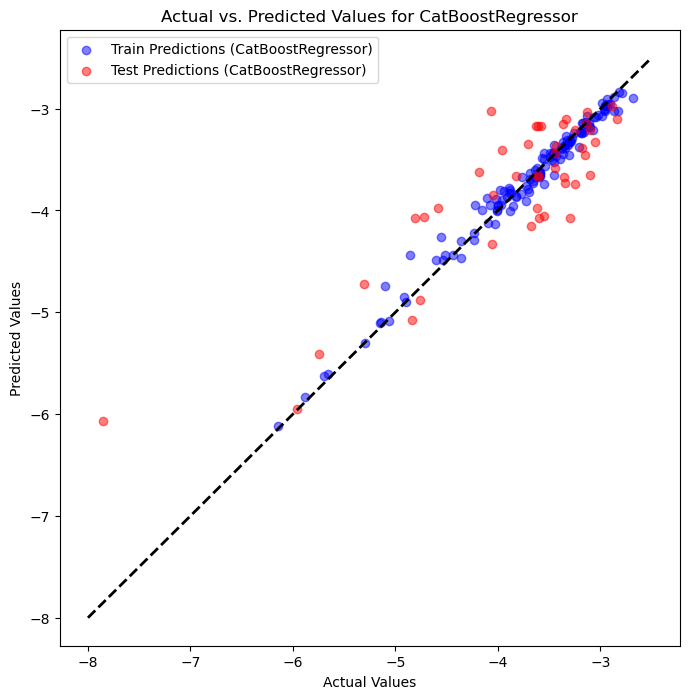

In [9]:
plt.figure(figsize=(8, 8))
plt.scatter(Y_train, Y_train_pred, color='blue', alpha=0.5, label='Train Predictions (CatBoostRegressor)')
# Plot for the test set (blue)
plt.scatter(Y_test, Y_test_pred, color='red', alpha=0.5, label='Test Predictions (CatBoostRegressor)')

plt.plot( [-8,-2.5], [-8,-2.5], 'k--', lw=2)
plt.title('Actual vs. Predicted Values for CatBoostRegressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()



## GradientBoostingRegressor ##

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X_knn, Y, test_size=0.25, random_state=42, shuffle=True)

model2 = GradientBoostingRegressor()
model2.fit(X_train, Y_train)
Y_train_pred = model2.predict(X_train)
Y_test_pred = model2.predict(X_test)

# Calculate metrics for this iteration
mse = mean_squared_error(Y_test, Y_test_pred)
r2_g = r2_score(Y_test, Y_test_pred)
print('R2 score for the GradientBoostingRegressor Model is: ', r2_g)

R2 score for the GradientBoostingRegressor Model is:  0.7094640605881983


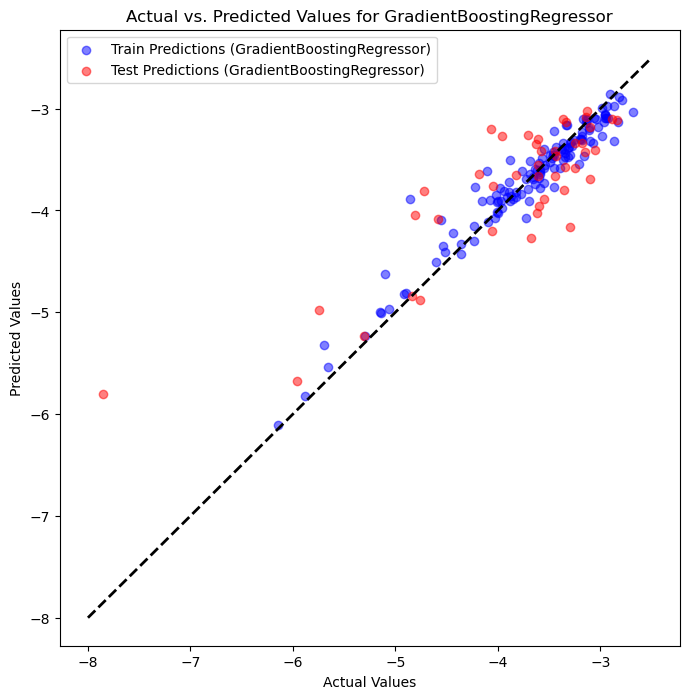

In [15]:
plt.figure(figsize=(8, 8))


plt.scatter(Y_train, Y_train_pred, color='blue', alpha=0.5, label='Train Predictions (GradientBoostingRegressor)')

# Plot for the test set (blue)
plt.scatter(Y_test, Y_test_pred, color='red', alpha=0.5, label='Test Predictions (GradientBoostingRegressor)')

plt.plot( [-8,-2.5], [-8,-2.5], 'k--', lw=2)
plt.title('Actual vs. Predicted Values for GradientBoostingRegressor')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()
